# Tokenisation

The notebook contains three types of tokenisation techniques:
1. Word tokenisation
2. Sentence tokenisation
3. Tweet tokenisation
4. Custom tokenisation using regular expressions

### 1. Word tokenisation

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pi0322945\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [1]:
document = "At nine o'clock I visited him myself. It looks like religious mania, and he'll soon think that he himself is God."
print(document)

At nine o'clock I visited him myself. It looks like religious mania, and he'll soon think that he himself is God.


Tokenising on spaces using python

In [2]:
print(document.split())

['At', 'nine', "o'clock", 'I', 'visited', 'him', 'myself.', 'It', 'looks', 'like', 'religious', 'mania,', 'and', "he'll", 'soon', 'think', 'that', 'he', 'himself', 'is', 'God.']


Tokenising using nltk word tokeniser

In [7]:
from nltk.tokenize import word_tokenize
words = word_tokenize(document)

In [8]:
print(words)

['At', 'nine', "o'clock", 'I', 'visited', 'him', 'myself', '.', 'It', 'looks', 'like', 'religious', 'mania', ',', 'and', 'he', "'ll", 'soon', 'think', 'that', 'he', 'himself', 'is', 'God', '.']


NLTK's word tokeniser not only breaks on whitespaces but also breaks contraction words such as he'll into "he" and "'ll". On the other hand it doesn't break "o'clock" and treats it as a separate token.

### 2. Sentence tokeniser

Tokenising based on sentence requires you to split on the period ('.'). Let's use nltk sentence tokeniser.

In [9]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(document)

In [10]:
print(sentences)

["At nine o'clock I visited him myself.", "It looks like religious mania, and he'll soon think that he himself is God."]


### 3. Tweet tokeniser

A problem with word tokeniser is that it fails to tokeniser emojis and other complex special characters such as word with hashtags. Emojis are common these days and people use them all the time.

In [11]:
message = "i recently watched this show called mindhunters:). i totally loved it 😍. it was gr8 <3. #bingewatching #nothingtodo 😎"

In [12]:
print(word_tokenize(message))

['i', 'recently', 'watched', 'this', 'show', 'called', 'mindhunters', ':', ')', '.', 'i', 'totally', 'loved', 'it', '😍', '.', 'it', 'was', 'gr8', '<', '3', '.', '#', 'bingewatching', '#', 'nothingtodo', '😎']


The word tokeniser breaks the emoji '<3' into '<' and '3' which is something that we don't want. Emojis have their own significance in areas like sentiment analysis where a happy face and sad face can salone prove to be a really good predictor of the sentiment. Similarly, the hashtags are broken into two tokens. A hashtag is used for searching specific topics or photos in social media apps such as Instagram and facebook. So there, you want to use the hashtag as is.

Let's use the tweet tokeniser of nltk to tokenise this message.

In [13]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

In [14]:
tknzr.tokenize(message)

['i',
 'recently',
 'watched',
 'this',
 'show',
 'called',
 'mindhunters',
 ':)',
 '.',
 'i',
 'totally',
 'loved',
 'it',
 '😍',
 '.',
 'it',
 'was',
 'gr8',
 '<3',
 '.',
 '#bingewatching',
 '#nothingtodo',
 '😎']

As you can see, it handles all the emojis and the hashtags pretty well.

Now, there is a tokeniser that takes a regular expression and tokenises and returns result based on the pattern of regular expression.

Let's look at how you can use regular expression tokeniser.

In [15]:
from nltk.tokenize import regexp_tokenize
message = "i recently watched this show called mindhunters:). i totally loved it 😍. it was gr8 <3. #bingewatching #nothingtodo 😎"

In [16]:
pattern = "#[\w]+"

regexp_tokenize(message, pattern)

['#bingewatching', '#nothingtodo']

### Bag of words model

In [17]:
# load all necessary libraries
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('max_colwidth', 100)

#### Let's build a basic bag of words model on three sample documents

In [18]:
documents = ["Gangs of Wasseypur is a great movie.", 
             "The success of a movie depends on the performance of the actors.",
             "There are no new movies releasing this week."]
print(documents)

['Gangs of Wasseypur is a great movie.', 'The success of a movie depends on the performance of the actors.', 'There are no new movies releasing this week.']


In [19]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def preprocess(document):
    'changes document to lower case and removes stopwords'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]

    # join words to make sentence
    document = " ".join(words)
    
    
    return document

documents = [preprocess(document) for document in documents]
print(documents)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pi0322945\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pi0322945\AppData\Roaming\nltk_data...


['gangs wasseypur great movie .', 'success movie depends performance actors .', 'new movies releasing week .']


[nltk_data]   Unzipping corpora\stopwords.zip.


#### Creating bag of words model using count vectorizer function

In [21]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(documents)
print(bow_model)  # returns the rown and column number of cells which have 1 as value

  (0, 2)	1
  (0, 10)	1
  (0, 3)	1
  (0, 4)	1
  (1, 4)	1
  (1, 9)	1
  (1, 1)	1
  (1, 7)	1
  (1, 0)	1
  (2, 6)	1
  (2, 5)	1
  (2, 8)	1
  (2, 11)	1


In [22]:
# print the full sparse matrix
print(bow_model.toarray())

[[0 0 1 1 1 0 0 0 0 0 1 0]
 [1 1 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 0 1 1 0 1 0 0 1]]


In [23]:
print(bow_model.shape)
print(vectorizer.get_feature_names())

(3, 12)
['actors', 'depends', 'gangs', 'great', 'movie', 'movies', 'new', 'performance', 'releasing', 'success', 'wasseypur', 'week']


C:\Users\pi0322945\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Let's create a bag of words model on the spam dataset.

In [24]:
# load data
spam = pd.read_csv("SMSSpamCollection.txt", sep = "\t", names=["label", "message"])
spam.shape

(5572, 2)

##### Let's take a subset of data (first 50 rows only) and create bag of word model on that.

In [25]:
spam = spam.iloc[0:100,:]
print(spam)

   label  \
0    ham   
1    ham   
2   spam   
3    ham   
4    ham   
..   ...   
95  spam   
96   ham   
97   ham   
98   ham   
99   ham   

                                                                                                message  
0   Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...  
1                                                                         Ok lar... Joking wif u oni...  
2   Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...  
3                                                     U dun say so early hor... U c already then say...  
4                                         Nah I don't think he goes to usf, he lives around here though  
..                                                                                                  ...  
95  Your free ringtone is waiting to be collected. Simply text the password "MIX" to 85069 to verify...  
96     

In [26]:
# extract the messages from the dataframe
messages = spam.message
print(messages)

0     Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...
1                                                                           Ok lar... Joking wif u oni...
2     Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3                                                       U dun say so early hor... U c already then say...
4                                           Nah I don't think he goes to usf, he lives around here though
                                                     ...                                                 
95    Your free ringtone is waiting to be collected. Simply text the password "MIX" to 85069 to verify...
96                                                                      Watching telugu movie..wat abt u?
97                                                    i see. When we finish we have loads of loans to pay
98    Hi. Wk been ok - on hols now! Yes on for

In [27]:
# convert messages into list
messages = [message for message in messages]
print(messages)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv", 'Even my brother is not like to speak with me. They treat me like aids patent.', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune", 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.', 'Had your mobile 

In [28]:
# preprocess messages using the preprocess function
messages = [preprocess(message) for message in messages]
print(messages)

['go jurong point , crazy .. available bugis n great world la e buffet ... cine got amore wat ...', 'ok lar ... joking wif u oni ...', "free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question ( std txt rate ) & c 's apply 08452810075over18 's", 'u dun say early hor ... u c already say ...', "nah n't think goes usf , lives around though", "freemsg hey darling 's 3 week 's word back ! 'd like fun still ? tb ok ! xxx std chgs send , £1.50 rcv", 'even brother like speak . treat like aids patent .', "per request 'melle melle ( oru minnaminunginte nurungu vettam ) ' set callertune callers . press * 9 copy friends callertune", 'winner ! ! valued network customer selected receivea £900 prize reward ! claim call 09061701461. claim code kl341 . valid 12 hours .', 'mobile 11 months ? u r entitled update latest colour mobiles camera free ! call mobile update co free 08002986030', "'m gon na home soon n't want talk stuff anymore tonight , k ? 've cried enoug

In [29]:
# bag of words model
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(messages)

In [30]:
# look at the dataframe
pd.DataFrame(bow_model.toarray(), columns = vectorizer.get_feature_names())

C:\Users\pi0322945\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,07732584351,0800,08000930705,08002986030,08452810075over18,09061209465,09061701461,09066364589,10,...,xxx,xxxmobilemovieclub,yeah,year,yes,yesterday,yo,yummy,yup,ú1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
print(vectorizer.get_feature_names())

['000', '07732584351', '0800', '08000930705', '08002986030', '08452810075over18', '09061209465', '09061701461', '09066364589', '10', '100', '1000', '10am', '11', '12', '1500', '150p', '150pm', '16', '169', '18', '20', '2005', '21st', '2nd', '3aj', '4403ldnw1a7rw18', '450ppw', '4txt', '50', '5000', '5249', '530', '5we', '6031', '6days', '81010', '85069', '87077', '87121', '87575', '8am', '900', '92h', '9pm', 'abiola', 'abt', 'ac', 'accomodations', 'aco', 'actin', 'advise', 'aft', 'afternoon', 'ah', 'ahead', 'ahhh', 'aids', 'almost', 'already', 'alright', 'always', 'amore', 'amp', 'animation', 'another', 'anymore', 'anything', 'apologetic', 'apply', 'appointment', 'arabian', 'ard', 'around', 'ask', 'available', 'awarded', 'babe', 'back', 'badly', 'barbie', 'becoz', 'bed', 'beforehand', 'best', 'bit', 'blessing', 'bonus', 'box', 'breather', 'britney', 'brother', 'buffet', 'bugis', 'burger', 'burns', 'bus', 'buy', 'bx420', 'ca', 'call', 'callers', 'callertune', 'calls', 'camcorder', 'came'

C:\Users\pi0322945\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


* A lot of duplicate tokens such as 'win'and 'winner'; 'reply' and 'replying'; 'want' and 'wanted' etc. 

In [32]:
bow_model.shape

(100, 640)

## Stemming

In [37]:
# import libraries
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [38]:
text = "Very orderly and methodical he looked, with a hand on each knee, and a loud watch ticking a sonorous sermon under his flapped newly bought waist-coat, as though it pitted its gravity and longevity against the levity and evanescence of the brisk fire."
print(text)

Very orderly and methodical he looked, with a hand on each knee, and a loud watch ticking a sonorous sermon under his flapped newly bought waist-coat, as though it pitted its gravity and longevity against the levity and evanescence of the brisk fire.


In [39]:
tokens = word_tokenize(text.lower())
print(tokens)

['very', 'orderly', 'and', 'methodical', 'he', 'looked', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'ticking', 'a', 'sonorous', 'sermon', 'under', 'his', 'flapped', 'newly', 'bought', 'waist-coat', ',', 'as', 'though', 'it', 'pitted', 'its', 'gravity', 'and', 'longevity', 'against', 'the', 'levity', 'and', 'evanescence', 'of', 'the', 'brisk', 'fire', '.']


In [40]:
stemmer = PorterStemmer()
porter_stemmed = [stemmer.stem(token) for token in tokens]
print(porter_stemmed)
len(porter_stemmed)

['veri', 'orderli', 'and', 'method', 'he', 'look', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'tick', 'a', 'sonor', 'sermon', 'under', 'hi', 'flap', 'newli', 'bought', 'waist-coat', ',', 'as', 'though', 'it', 'pit', 'it', 'graviti', 'and', 'longev', 'against', 'the', 'leviti', 'and', 'evanesc', 'of', 'the', 'brisk', 'fire', '.']


47

In [41]:
# snowball stemmer
stemmer = SnowballStemmer("english")
snowball_stemmed = [stemmer.stem(token) for token in tokens]
print(snowball_stemmed)
len(snowball_stemmed)

['veri', 'order', 'and', 'method', 'he', 'look', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'tick', 'a', 'sonor', 'sermon', 'under', 'his', 'flap', 'newli', 'bought', 'waist-coat', ',', 'as', 'though', 'it', 'pit', 'it', 'graviti', 'and', 'longev', 'against', 'the', 'leviti', 'and', 'evanesc', 'of', 'the', 'brisk', 'fire', '.']


47

In [42]:
df = pd.DataFrame({'token': tokens, 'porter_stemmed': porter_stemmed, 'snowball_stemmed': snowball_stemmed})
df = df[['token', 'porter_stemmed', 'snowball_stemmed']]

In [43]:
df[(df.token != df.porter_stemmed) | (df.token != df.snowball_stemmed)]

,token,porter_stemmed,snowball_stemmed
0,very,veri,veri
1,orderly,orderli,order
3,methodical,method,method
5,looked,look,look
18,ticking,tick,tick
20,sonorous,sonor,sonor
23,his,hi,his
24,flapped,flap,flap
25,newly,newli,newli
32,pitted,pit,pit


## Lemmatization

In [48]:
### import necessary libraries
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pi0322945\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [49]:
text = "Very orderly and methodical he looked, with a hand on each knee, and a loud watch ticking a sonorous sermon under his flapped newly bought waist-coat, as though it pitted its gravity and longevity against the levity and evanescence of the brisk fire."
print(text)

Very orderly and methodical he looked, with a hand on each knee, and a loud watch ticking a sonorous sermon under his flapped newly bought waist-coat, as though it pitted its gravity and longevity against the levity and evanescence of the brisk fire.


In [50]:
# tokenise text
tokens = word_tokenize(text)

In [51]:
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
print(lemmatized)

['Very', 'orderly', 'and', 'methodical', 'he', 'looked', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'ticking', 'a', 'sonorous', 'sermon', 'under', 'his', 'flapped', 'newly', 'bought', 'waist-coat', ',', 'a', 'though', 'it', 'pitted', 'it', 'gravity', 'and', 'longevity', 'against', 'the', 'levity', 'and', 'evanescence', 'of', 'the', 'brisk', 'fire', '.']


### Let's compare stemming and lemmatization

In [52]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
stemmed = [stemmer.stem(token) for token in tokens]
print(stemmed)

['veri', 'orderli', 'and', 'method', 'he', 'look', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'tick', 'a', 'sonor', 'sermon', 'under', 'hi', 'flap', 'newli', 'bought', 'waist-coat', ',', 'as', 'though', 'it', 'pit', 'it', 'graviti', 'and', 'longev', 'against', 'the', 'leviti', 'and', 'evanesc', 'of', 'the', 'brisk', 'fire', '.']


In [53]:
import pandas as pd
df = pd.DataFrame(data={'token': tokens, 'stemmed': stemmed, 'lemmatized': lemmatized})
df = df[['token', 'stemmed', 'lemmatized']]
df[(df.token != df.stemmed) | (df.token != df.lemmatized)]

,token,stemmed,lemmatized
0,Very,veri,Very
1,orderly,orderli,orderly
3,methodical,method,methodical
5,looked,look,looked
18,ticking,tick,ticking
20,sonorous,sonor,sonorous
23,his,hi,his
24,flapped,flap,flapped
25,newly,newli,newly
29,as,as,a


Let's compare the speed of both techniques

In [54]:
import requests
url = "https://www.gutenberg.org/files/11/11-0.txt"
alice = requests.get(url)
print(alice.text)

ï»¿The Project Gutenberg eBook of Aliceâs Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Aliceâs Adventures in Wonderland

Author: Lewis Carroll

Release Date: January, 1991 [eBook #11]
[Most recently updated: October 12, 2020]

Language: English

Character set encoding: UTF-8

Produced by: Arthur DiBianca and David Widger

*** START OF THE PROJECT GUTENBERG EBOOK ALICEâS ADVENTURES IN WONDERLAND ***

[Illustration]




Aliceâs Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down t

In [55]:
wordnet_lemmatizer = WordNetLemmatizer()
wordnet_lemmatizer.lemmatize("having")

'having'

In [56]:
%%time
_ = [wordnet_lemmatizer.lemmatize(token, pos='n') for token in word_tokenize(alice.text)]

Wall time: 311 ms


In [57]:
%%time
_ = [stemmer.stem(token) for token in word_tokenize(alice.text)]

Wall time: 660 ms


# Insights

* Lemmatising is faster than stemming in this case because the nltk lemmatiser also takes another argument called the part-of-speech (POS) tag of the input word.
* The default part-of-speech tag is 'noun'..
* You will learn more about part-of-speech tagging later in this course.
* Right now, the stemmer will have more accuracy than the lemmatiser because each word is lemmatised assuming it's a noun. To lemmatise efficiently, you need to pass it's POS tag manually.

### TF-IDF model

In [58]:
# load all necessary libraries
# import pandas as pd
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option('max_colwidth', 100)

#### Let's build a basic bag of words model on three sample documents

In [59]:
documents = ["Gangs of Wasseypur is a great movie. Wasseypur is a town in Bihar.", "The success of a song depends on the music.", "There is a new movie releasing this week. The movie is fun to watch."]
print(documents)

['Gangs of Wasseypur is a great movie. Wasseypur is a town in Bihar.', 'The success of a song depends on the music.', 'There is a new movie releasing this week. The movie is fun to watch.']


In [60]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

# add stemming and lemmatisation in the preprocess function
def preprocess(document):
    'changes document to lower case and removes stopwords'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]
    
    # stem
    #words = [stemmer.stem(word) for word in words]
    
    # join words to make sentence
    document = " ".join(words)
    
    return document

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pi0322945\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pi0322945\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
documents = [preprocess(document) for document in documents]
print(documents)

['gangs wasseypur great movie . wasseypur town bihar .', 'success song depends music .', 'new movie releasing week . movie fun watch .']


#### Creating bag of words model using count vectorizer function

In [62]:
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(documents)
print(tfidf_model)  # returns the row number and column number of cells which have 1 as value

  (0, 0)	0.3414262179382391
  (0, 11)	0.3414262179382391
  (0, 5)	0.2596634391575384
  (0, 4)	0.3414262179382391
  (0, 12)	0.6828524358764781
  (0, 3)	0.3414262179382391
  (1, 6)	0.5
  (1, 1)	0.5
  (1, 9)	0.5
  (1, 10)	0.5
  (2, 13)	0.369772375024391
  (2, 2)	0.369772375024391
  (2, 14)	0.369772375024391
  (2, 8)	0.369772375024391
  (2, 7)	0.369772375024391
  (2, 5)	0.5624428445132056


In [63]:
# print the full sparse matrix
print(tfidf_model.toarray())

[[0.34142622 0.         0.         0.34142622 0.34142622 0.25966344
  0.         0.         0.         0.         0.         0.34142622
  0.68285244 0.         0.        ]
 [0.         0.5        0.         0.         0.         0.
  0.5        0.         0.         0.5        0.5        0.
  0.         0.         0.        ]
 [0.         0.         0.36977238 0.         0.         0.56244284
  0.         0.36977238 0.36977238 0.         0.         0.
  0.         0.36977238 0.36977238]]


In [64]:
pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names())

C:\Users\pi0322945\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bihar,depends,fun,gangs,great,movie,music,new,releasing,song,success,town,wasseypur,watch,week
0,0.341426,0.0,0.000000,0.341426,0.341426,0.259663,0.0,0.000000,0.000000,0.0,0.0,0.341426,0.682852,0.000000,0.000000
1,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.5,0.5,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.369772,0.000000,0.000000,0.562443,0.0,0.369772,0.369772,0.0,0.0,0.000000,0.000000,0.369772,0.369772


### Let's create a tf-idf model on the spam dataset.

In [65]:
# load data
spam = pd.read_csv("SMSSpamCollection.txt", sep = "\t", names=["label", "message"])
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


##### Let's take a subset of data (first 50 rows only) and create bag of word model on that.

In [66]:
spam = spam.iloc[0:50,:]
print(spam)

   label  \
0    ham   
1    ham   
2   spam   
3    ham   
4    ham   
5   spam   
6    ham   
7    ham   
8   spam   
9   spam   
10   ham   
11  spam   
12  spam   
13   ham   
14   ham   
15  spam   
16   ham   
17   ham   
18   ham   
19  spam   
20   ham   
21   ham   
22   ham   
23   ham   
24   ham   
25   ham   
26   ham   
27   ham   
28   ham   
29   ham   
30   ham   
31   ham   
32   ham   
33   ham   
34  spam   
35   ham   
36   ham   
37   ham   
38   ham   
39   ham   
40   ham   
41   ham   
42  spam   
43   ham   
44   ham   
45   ham   
46   ham   
47   ham   
48   ham   
49   ham   

                                                                                                message  
0   Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...  
1                                                                         Ok lar... Joking wif u oni...  
2   Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 200

In [67]:
# extract the messages from the dataframe
messages = [message for message in spam.message]
print(messages)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv", 'Even my brother is not like to speak with me. They treat me like aids patent.', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune", 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.', 'Had your mobile 

In [68]:
# preprocess messages using the preprocess function
messages = [preprocess(message) for message in messages]
print(messages)

['go jurong point , crazy .. available bugis n great world la e buffet ... cine got amore wat ...', 'ok lar ... joking wif u oni ...', "free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question ( std txt rate ) & c 's apply 08452810075over18 's", 'u dun say early hor ... u c already say ...', "nah n't think goes usf , lives around though", "freemsg hey darling 's 3 week 's word back ! 'd like fun still ? tb ok ! xxx std chgs send , £1.50 rcv", 'even brother like speak . treat like aids patent .', "per request 'melle melle ( oru minnaminunginte nurungu vettam ) ' set callertune callers . press * 9 copy friends callertune", 'winner ! ! valued network customer selected receivea £900 prize reward ! claim call 09061701461. claim code kl341 . valid 12 hours .', 'mobile 11 months ? u r entitled update latest colour mobiles camera free ! call mobile update co free 08002986030', "'m gon na home soon n't want talk stuff anymore tonight , k ? 've cried enoug

In [69]:
# bag of words model
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(messages)

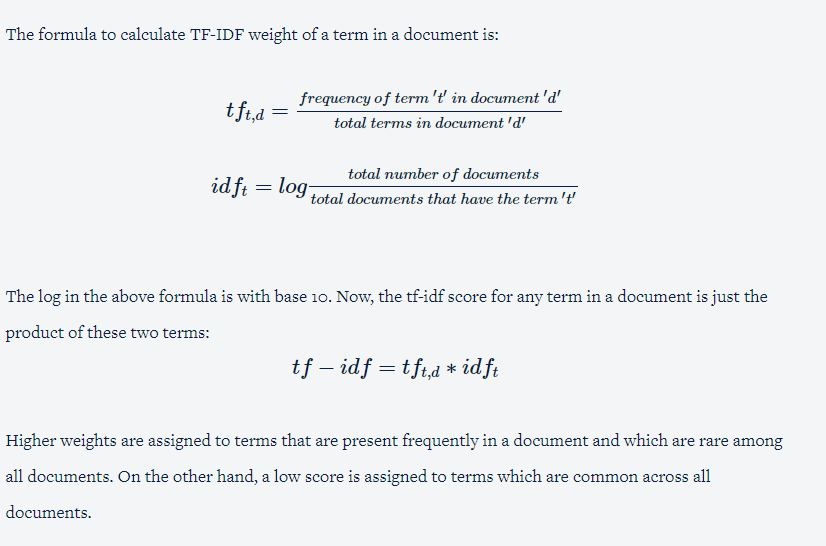

In [70]:
# Let's look at the dataframe
tfidf = pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names())
tfidf

C:\Users\pi0322945\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,07732584351,08000930705,08002986030,08452810075over18,09061701461,100,11,12,150p,...,worried,www,xuhui,xxx,xxxmobilemovieclub,yeah,yes,yummy,yup,ú1
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.198284,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.256871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.230701,0.000000,0.000000,0.230701,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.230794,0.000000,0.000000,0.000000,0.230794,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [71]:
# token names
print(vectorizer.get_feature_names())

['000', '07732584351', '08000930705', '08002986030', '08452810075over18', '09061701461', '100', '11', '12', '150p', '16', '20', '2005', '21st', '2nd', '4403ldnw1a7rw18', '4txt', '50', '6days', '81010', '87077', '87121', '87575', '8am', '900', 'abiola', 'actin', 'aft', 'ahead', 'ahhh', 'aids', 'already', 'alright', 'always', 'amore', 'amp', 'anymore', 'anything', 'apologetic', 'apply', 'arabian', 'ard', 'around', 'ask', 'available', 'back', 'badly', 'bit', 'blessing', 'breather', 'brother', 'buffet', 'bugis', 'burns', 'bus', 'ca', 'call', 'callers', 'callertune', 'calls', 'camcorder', 'camera', 'car', 'cash', 'catch', 'caught', 'chances', 'charged', 'cheers', 'chgs', 'child', 'cine', 'claim', 'clear', 'click', 'co', 'code', 'colour', 'com', 'comin', 'comp', 'confirm', 'convincing', 'copy', 'cost', 'could', 'crave', 'crazy', 'credit', 'cried', 'csh11', 'cup', 'cuppa', 'customer', 'da', 'darling', 'date', 'day', 'dbuk', 'decide', 'decided', 'delivery', 'dinner', 'done', 'dont', 'dun', 'ea

C:\Users\pi0322945\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1. Language related features e.g. phone numbers
2. Capital words at the start of message Congratulations
3. Words follwed by exclamation hurray..., dhamaka !